In [65]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import ipyleaflet
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, projections,GeoJSON,GeoData
import seaborn
import contextily
from sklearn.cluster import DBSCAN
import numpy as np

In [8]:
thailandmap = gpd.read_file('data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

burnscar = gpd.read_file("data\Burnt_LC0809_20240101_0531_Prv\Burnt_LC0809_20240101_0531_Prv.shp",crs=3857)
burnscar = burnscar.to_crs(4326)

hotspot = gpd.read_file("data\\DL_FIRE_SV-C2_571430\\fire_nrt_SV-C2_571430.shp",crs=4326)

sugarcanearea = gpd.read_file("data\\แผนที่สภาพการใช้ที่ดิน (แยกเอาเฉพาะที่เป็นอ้อย) -2022-2023\\พื้นที่ปลูกอ้อย.geojson")
sugarcanearea = sugarcanearea.to_crs(4326)

sugarplant = gpd.read_file("data\\ตำแหน่งโรงงานน้ำตาล\\โรงงานน้ำตาล.geojson")
sugarplant = sugarplant.to_crs(4326)

d:\workstation\ESDA_Sugarcan_vs_Hotspot\env\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
d:\workstation\ESDA_Sugarcan_vs_Hotspot\env\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(
d:\workstation\ESDA_Sugarcan_vs_Hotspot\env\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


C:\Users\595078\AppData\Local\Temp\ipykernel_25612\114745696.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot = seaborn.kdeplot(


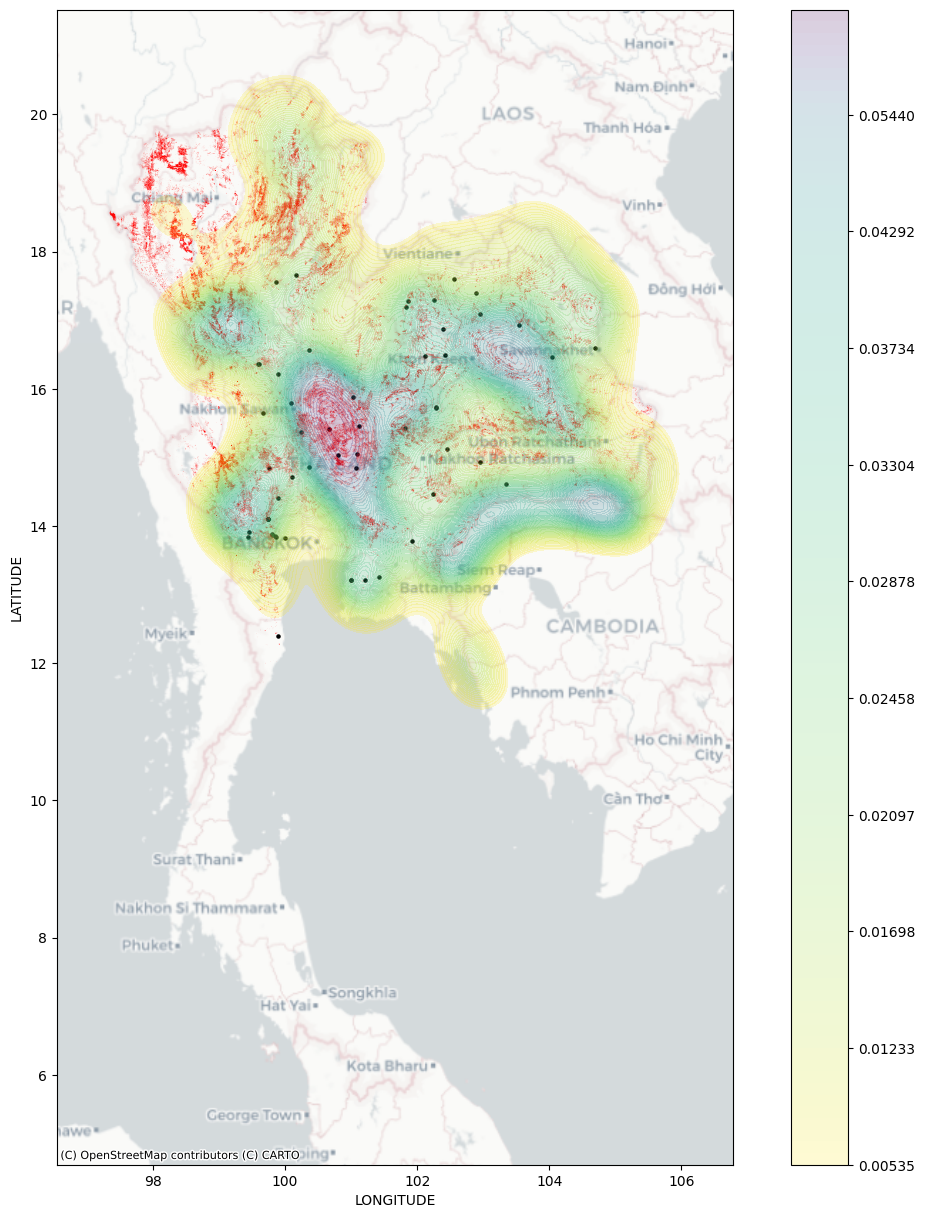

In [136]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(15, 15))

ax.scatter(sugarplant['x'], sugarplant['y'], color='black', s=5, label='Points')
burnscar.plot(ax=ax, color='red')

# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
kdeplot = seaborn.kdeplot(
    x="LONGITUDE",
    y="LATITUDE",
    data=hotspot,
    n_levels=100,
    shade=True,
    alpha=0.2,
    cmap="viridis_r",
    cbar=True
)

# Add basemap
contextily.add_basemap(
    ax,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron
)

ax.label_outer()
# Remove axes
# ax.set_axis_off()